# 1D Fractal Interpolation 

## Theory 

In one dimensional fractal interpolation, we assume the interpolation data to be in the form 
$$
P = \{ (x_i, y_i) ~|~  x_i, y_i \in \mathbb{R}, \quad i = 1, 2, \ldots, N \}
$$
where $N$ is the number of points. The aim of the interpolatin is to find a continuous function $f : \mathbb{R} \mapsto \mathbb{R}$ such that $f(x_i) = y_i$. 



To solve this interpolation problem, we divide the interpolation domain $I$ into subintervals $I_n$ such that $I = \cup_{n = 1}^N I_n, \; I_n = [x_{n - 1}, x_{n}]$ 
and assume an iterated function system $\mathcal{I} = \{ w_n, I \times \mathbb{R}\}$ such that
$$
w_n(x, y) = \begin{bmatrix}
    a_{11, n} & 0 \\ 
    a_{21, n} & a_{22, n}
\end{bmatrix}
\begin{bmatrix}
    x \\ y 
\end{bmatrix} + 
\begin{bmatrix}
    b_{1,n} \\ b_{2, n} 
\end{bmatrix} \quad n = 1, 2, \ldots, N  
$$

Then, it can be shown that the interpolant $f$ is the fixed point of a function mapping $\mathcal{M}[f](x) = F_n(L_n^{-1}(x), f(L_n^{-1}(x)))$, i.e.$f = \lim_{n \mapsto \infty} T^n[f]$, where, 
$$
\begin{aligned}
L_n(x) &= a_{11, n} x + b_{1, n} \\ 
F_n(x, y) &= a_{21, n} x + a_{22, n}y + b_{2, n}
\end{aligned}
$$



Here the unknown coefficients of the transformation $w_n$ can be found using the boundary conditions.
$$
\begin{aligned}
    w_n({x_0, y_0}) &= (x_{n - 1}, y_{n - 1}) \\
    w_n({x_N, y_N}) &= (x_{n}, y_{n})
\end{aligned}
$$

Thus we have, 
$$
\begin{aligned}
    a_{11, n} x_0 + b_{1, n} &= x_{n - 1} \\ 
    a_{11, n} x_N + b_{1, n} &= x_{n}
\end{aligned}
$$
and 
$$
\begin{aligned}
    a_{21, n} x_0 + b_{2, n} &= y_{n - 1} - a_{22, n} y_0 \\ 
    a_{21, n} x_N + b_{1, n} &= y_{n} - a_{22, n} y_N 
\end{aligned}
$$

For each of $w_n$ we have the unknowns, $a_{11,n}, a_{21, n}, a_{22, n}, b_{1, n}, b_{2,n}$. We have five unknowns, but we only have four equations. Thus we choos $a_{22, n}$ as the free variable to solve the eqaution systems for the remaining unknowns. Thus, we can solve the following linear equations system for the unknowns $a_{11, n}, a_{21, n}, b_{1, n}, b_{2,n}$ we can construct the IFS
$$
\begin{bmatrix}
    x_0 & 1 \\ 
    x_N & 1 
\end{bmatrix}
\begin{bmatrix} 
    a_{11, n} & b_{1,n}\\ 
    a_{21, n} & b_{2, n}
\end{bmatrix}
\begin{bmatrix} 
    x_{n - 1} & y_{n - 1} - a_{22, n} y_0 \\ 
    x_{n} & y_{n} - a_{22, n} y_N 
\end{bmatrix}
$$

## Application 

In this section, we will apply the theoretical analysis presented in the previous section. 

### Regular Data Interpolation 
In this subsection, we will interpolate some regular data drawn from a smooth function. Below is an example script for one dimensional fractal interpolation for regular data. Note from the output that the fractal interpolation fits to the data. 

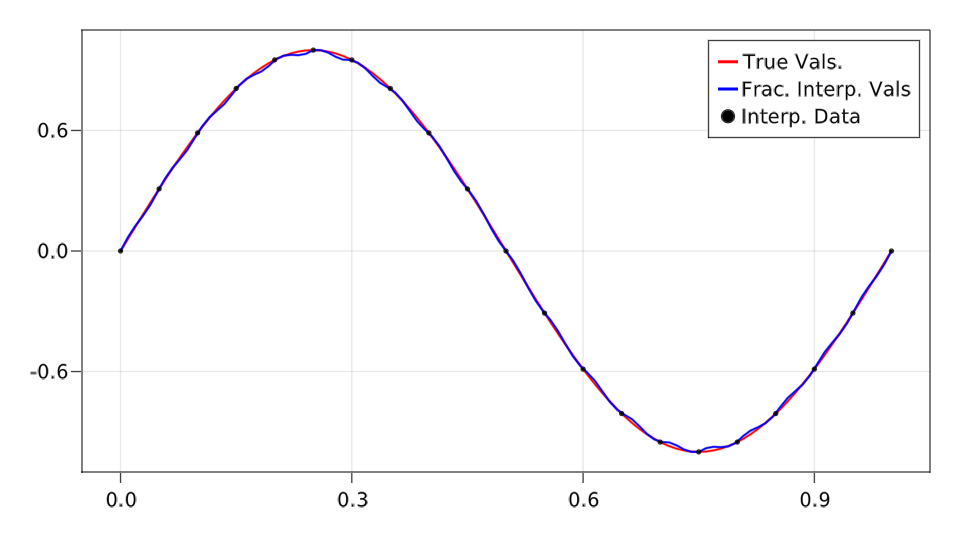

In [35]:
# Load the libraries 
using FractalTools 
using Makie 

# Construct a data set 
npts = 21                           # Number of data samples. 
f = FractalTools.sinusoid           # The function to be sampled for data
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.01                                  # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Irregular Data Interpolation

In this subsection, we will interpolate irregular data that is drawn from a nonwhere differentiable function. The scripts below includes such a use case. Note from the figure that the interpolant fits well to the data. Beware also that the fractal interpolant reflects the irregularities that are inherent in the interpolation data. In this context, the fractal interpolant are natural alternatives of the spline interpolants for irregular complex data. 

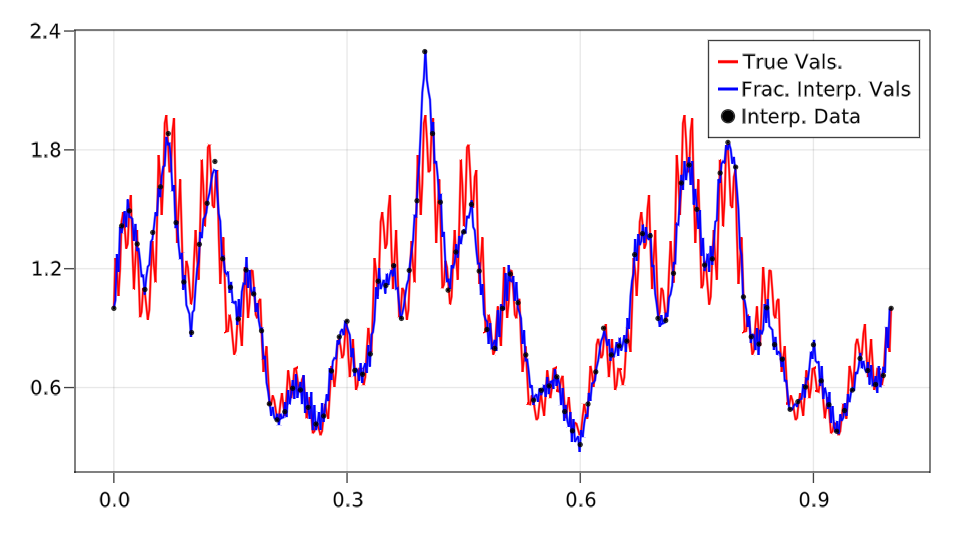

In [36]:
# Load the libraries 
using FractalTools 
using Makie 

# Construct a data set 
npts = 101                          # Number of data samples. 
f = FractalTools.wen                # The function to be sampled for data
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.1                                  # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Effect of Free Variable 

The free variables $a_{22,n}, \; n = 1, 2, \ldots, N$ have a direct impact on the performance of the interpolation. The variables are also scaling parameters, they determine the smoothness of the interpolant. The close the free variable to zero are, the smoother the resulting interpolants are. So, it the user's responsibility to specify the scaling parameter. As a rule of thumb, if the data is smooth then the free variables should be close to zero. If the data is irregular that manifest some self-repeating pattern, then the free variables should be close to one. Note that the lower and upper limits of the free variables are 0 and 1, respectively. To see the effect of free variable on the resulting interpolant, let us repeat the previous example, but with a different free variable. Note from the output figure that the interpolant does reflect the irregularity of the data but looks like a spline interpolant. 

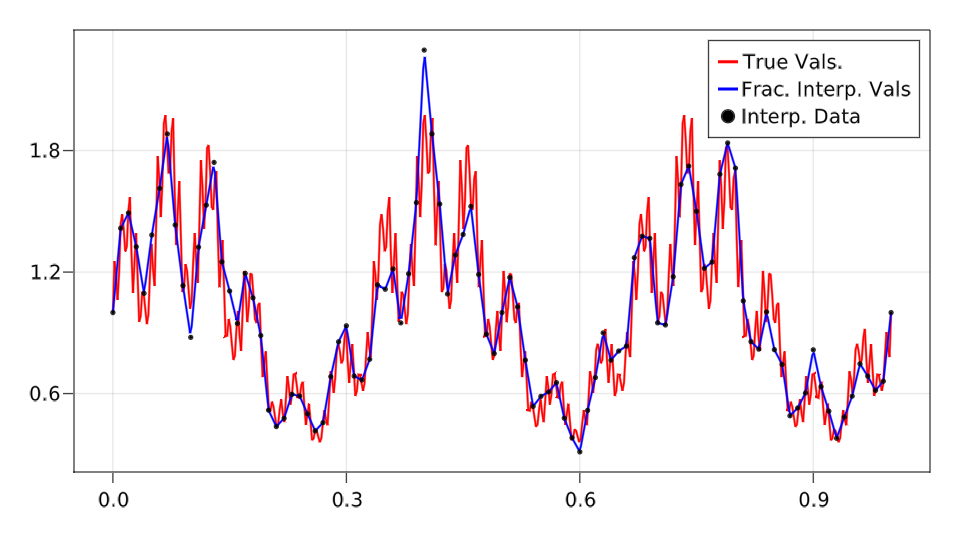

In [37]:
# Load the libraries 
using FractalTools 
using Makie 

# Construct a data set 
npts = 101                          # Number of data samples. 
f = FractalTools.wen                # The function to be sampled for data
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.0001                                # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Mean Square Error versus Free Variable

Mean square eror (MSE) can be used as a metric to compare the performance of the interpolant. Let $e[k], k = 1, 2, \ldots, N$ be the sampled interpolation error. Then MSE of $e$ is 
$$
MSE_e = \dfrac{1}{N} \sum_{k = 1}^{N} e^2[k]
$$
In the previous subsection, we investigated the effect of the free variable. For a broader look at how the free variable can effect the interpolation MSE let us look at following script.Note from the figure that as the scaling parameter goes to zero, the MSE goes to zero. 

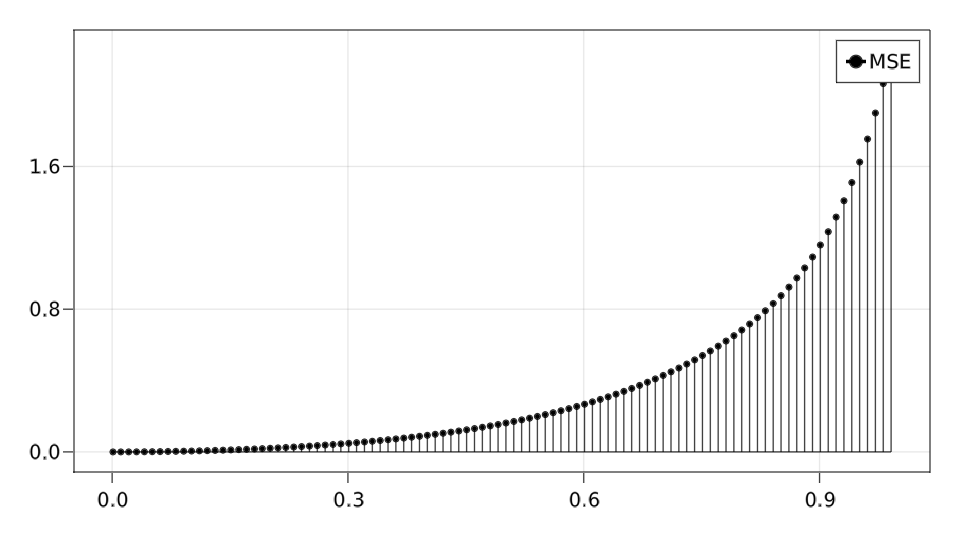

In [38]:
# Construct interpolation data 
f = FractalTools.sinusoid
npts = 21 
domain = [[0.], [1.]]   
pts = getdata(f, domain, npts)

# Construct some test data 
ntpts = 5 * npts 
tpts = getdata(domain, ntpts)
xt = getindex.(tpts, 1)

# Compute true values 
fval = f.(xt)

# Compute errors 
freevars = 0.001 : 0.01 : 0.999
mse = map(freevars) do freevar 
    interp = interpolate(pts, Interp1D(freevar))
    ival = interp.(xt)
    sum((fval - ival).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1,1] = Axis(fig) 
plt = stem!(ax, freevars, mse, color=:black, markersize=5, 
    xlabel="Free Variables", label="MSE")
axislegend(ax)
fig 

However, for the irregular data the MSE does not goes to zero even if the free variable goes to zero. The reason is that as the free variable goes to zero, the fractal interpolation approches to some kind of (maybe cubic, quadratic, etc.) spline interpolation. Since the resulting interpolant becomes so smooth such that it can no longer reflect the irregularity of the data, the MSE does not approach to zero. 

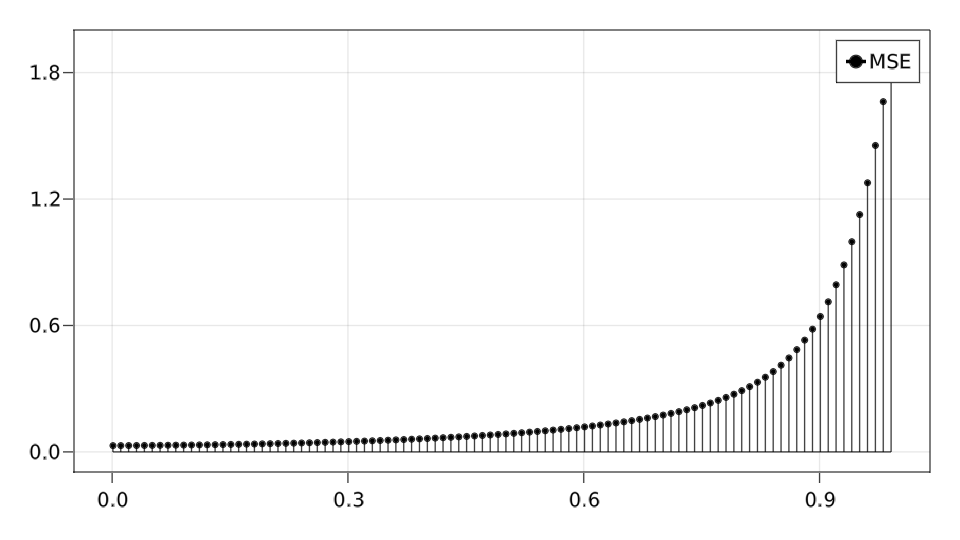

In [39]:
# Construct interpolation data 
f = FractalTools.wen
npts = 51
domain = [[0.], [1.]]   
pts = getdata(f, domain, npts)

# Construct some test data 
ntpts = 5 * npts 
tpts = getdata(domain, ntpts)
xt = getindex.(tpts, 1)

# Compute true values 
fval = f.(xt)

# Compute errors 
freevars = 0.001 : 0.01 : 0.999
mse = map(freevars) do freevar 
    interp = interpolate(pts, Interp1D(freevar))
    ival = interp.(xt)
    sum((fval - ival).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1,1] = Axis(fig) 
plt = stem!(ax, freevars, mse, color=:black, markersize=5, 
    xlabel="Free Variables", label="MSE")
axislegend(ax)
fig 

### Comparison with Spline Interpolation 

In this section, we compare the performance of the fractal interpolation to that of spline interpolation. The following script illustrates that the spline interpolation is not good choose for the interpolation of irregular data. 

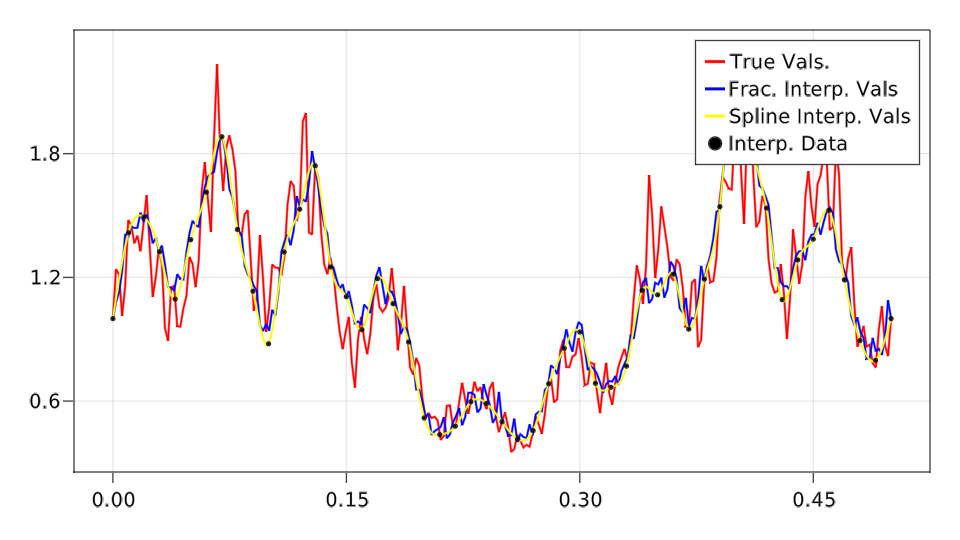

In [40]:
# Load the libraries 
using FractalTools 
using Makie 
import Interpolations 

# Construct a data set 
npts = 51                           # Number of data samples. 
f = FractalTools.wen                # The function to be sampled for data
domain = [[0.], [0.5]]              # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.1                                  # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant

x = getindex.(pts, 1)
xr = range(x[1], x[end], step=x[2] - x[1])
yr = f.(xr)
spline_interp = Interpolations.CubicSplineInterpolation(xr, yr)

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 
spline_interpvals = spline_interp.(xt)  # Spline interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
lines!(xt, spline_interpvals, linewidth=2, color=:yellow, label="Spline Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Mean Square Error versus Number of Points 

The number of points also a direct impact on the performance of the interpolation domain. We expect that as the number of points in a given interpolation domain increases, the MSE of the interpolation decreases. This expectation is observed from the figure obtained in the following script. 

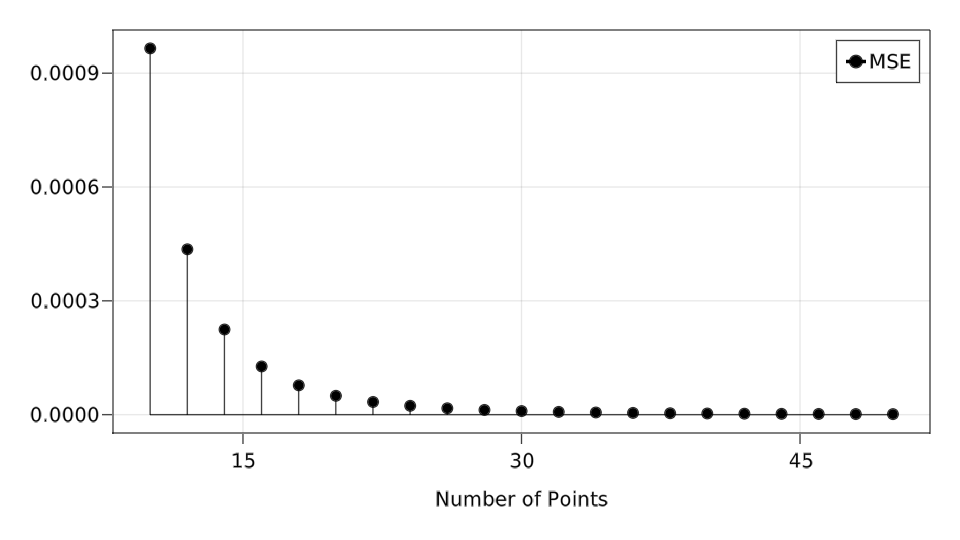

In [41]:
# This file investigates mean square error (MSE) with respect to number of interpolation points in 1D interpolation 

using FractalTools 
using Makie 

# Construct interpolation data 
f = FractalTools.sinusoid
domain = [[0.], [1.]]
freevar = 0.001                
npts = 10 : 2 : 50

# Construct test data 
ntpts = 5 * npts[end]
xt = collect(range(only(first(domain)), only(last(domain)), length=ntpts))
fval = f.(xt)

# Compute errors 
mse = map(npts) do npt 
    # Construct interpolation data 
    pts = getdata(f, domain, npt)

    # Construct interpolation 
    interp = interpolate(pts, Interp1D(freevar))
    ival = interp.(xt)

    # Compute error
    sum((fval - ival ).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1, 1] = Axis(fig, xlabel="Number of Points") 
stem!(ax, npts, mse, color=:black, label="MSE")
axislegend(ax)
fig 


### Mean Square Error versus Number of Iterations

Apart from the free variable, the number of iterations also has a direct on the performance of the interpolation. Theoretically, the interpolant is the fixed point of the mapping $M[f]$. This implies the number of iterations must be infinite. However, this is not applicable. So, the the iterations are carried for a finite value, say $K$, So, the returned interpolant $f$, is actually, 
$$
f = T^{K}[f_0]
$$
where $f_0$ is the initial function, whose default is the zero function $f_0(x) = 0, \; \forall x$. Interestingly, after the second iteration, the interpolation MSE does not change much. 

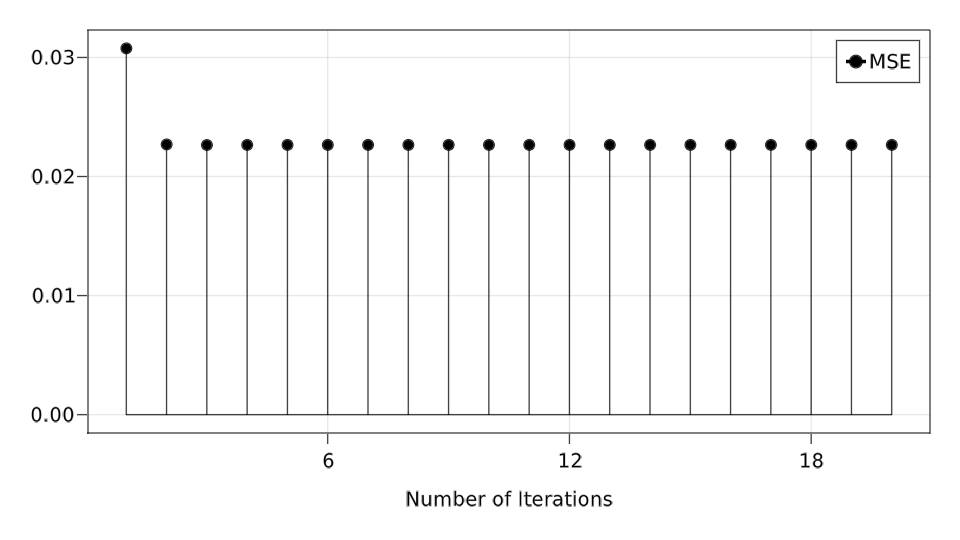

In [64]:
# This file investigates mean square error (MSE) with respect to number of interpolation points in 1D interpolation 

using FractalTools 
using Makie 

# Construct interpolation data 
f = FractalTools.wen
domain = [[0.], [1.]]
freevar = 0.1                
npts = 101
niters = 1 : 20

# Construct interpolation data 
pts = getdata(f, domain, npts)

# Construct test data 
ntpts = 5 * npts[end]
xt = collect(range(only(first(domain)), only(last(domain)), length=ntpts))
fval = f.(xt)

# Compute errors 
mse = map(niters) do niter 
    # Construct interpolation 
    interp = interpolate(pts, Interp1D(freevar), niter=niter)
    ival = interp.(xt)

    # Compute error
    sum((fval - ival ).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1, 1] = Axis(fig, xlabel="Number of Iterations") 
stem!(ax, niters, mse, color=:black, label="MSE")
axislegend(ax)
fig 
